# Gym Churn Analysis - 탐색적 데이터 분석 (EDA)

## 프로젝트 개요
- **데이터셋**: gym_churn_us.csv
- **목표**: 헬스장 회원의 이탈(Churn) 패턴 파악 및 주요 요인 분석
- **분석 방법**: 통계 분석, 시각화, 상관관계 분석

## 1. 라이브러리 임포트

In [38]:
# 기본 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 통계 분석
from scipy import stats
from scipy.stats import chi2_contingency, ttest_ind

# 한글 폰트 설정 (Windows)
plt.rcParams['font.family'] = 'Malgun Gothic'  # 맑은 고딕
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 시각화 설정
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("모든 라이브러리 임포트 완료!")

모든 라이브러리 임포트 완료!


## 2️. 데이터 로드 및 기본 정보

In [39]:
# 데이터 로드
data = pd.read_csv('../data/raw/gym_churn_us.csv')

print("데이터셋 기본 정보")
print(f"\n데이터 크기: {data.shape}")
print(f"전체 샘플 수: {data.shape[0]:,}개")
print(f"특성 수: {data.shape[1]}개")
print("\n첫 5개 행:")
data.head()

데이터셋 기본 정보

데이터 크기: (4000, 14)
전체 샘플 수: 4,000개
특성 수: 14개

첫 5개 행:


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [40]:
# 데이터 타입 및 결측치 확인
print("데이터 타입 및 결측치")

info_df = pd.DataFrame({
    '데이터 타입': data.dtypes,
    '결측치 수': data.isnull().sum(),
    '결측치 비율(%)': (data.isnull().sum() / len(data) * 100).round(2),
    '고유값 수': data.nunique()
})

print(info_df)
print(f"총 결측치: {data.isnull().sum().sum()}개")

데이터 타입 및 결측치
                                    데이터 타입  결측치 수  결측치 비율(%)  고유값 수
gender                               int64      0        0.0      2
Near_Location                        int64      0        0.0      2
Partner                              int64      0        0.0      2
Promo_friends                        int64      0        0.0      2
Phone                                int64      0        0.0      2
Contract_period                      int64      0        0.0      3
Group_visits                         int64      0        0.0      2
Age                                  int64      0        0.0     23
Avg_additional_charges_total       float64      0        0.0   4000
Month_to_end_contract              float64      0        0.0     12
Lifetime                             int64      0        0.0     29
Avg_class_frequency_total          float64      0        0.0   3913
Avg_class_frequency_current_month  float64      0        0.0   3820
Churn                              

## 3️. 특성(Features) 상세 분석

### 특성 설명
1. **gender**: 성별 (0: 여성, 1: 남성)
2. **Near_Location**: 거주지가 헬스장 근처 여부 (0: 아니오, 1: 예)
3. **Partner**: 파트너 회원 여부 (0: 아니오, 1: 예)
4. **Promo_friends**: 친구 프로모션 참여 여부 (0: 아니오, 1: 예)
5. **Phone**: 전화번호 제공 여부 (0: 아니오, 1: 예)
6. **Contract_period**: 계약 기간 (1, 6, 12개월)
7. **Group_visits**: 그룹 수업 참여 여부 (0: 아니오, 1: 예)
8. **Age**: 나이
9. **Avg_additional_charges_total**: 총 평균 추가 요금
10. **Month_to_end_contract**: 계약 종료까지 남은 개월 수
11. **Lifetime**: 회원으로 활동한 총 기간 (개월)
12. **Avg_class_frequency_total**: 총 평균 수업 참여 빈도
13. **Avg_class_frequency_current_month**: 현재 월 평균 수업 참여 빈도
14. **Churn**: 이탈 여부 (0: 유지, 1: 이탈) - **타겟 변수**

In [41]:
# 기술 통계량
print("수치형 변수 기술 통계량")
data.describe().round(2)

수치형 변수 기술 통계량


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.00,4000.00,4000.00,4000.00,4000.0,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00
mean,0.51,0.85,0.49,0.31,0.9,4.68,0.41,29.18,146.94,4.32,3.72,1.88,1.77,0.27
std,0.50,0.36,0.50,0.46,0.3,4.55,0.49,3.26,96.36,4.19,3.75,0.97,1.05,0.44
min,0.00,0.00,0.00,0.00,0.0,1.00,0.00,18.00,0.15,1.00,0.00,0.00,0.00,0.00
25%,0.00,1.00,0.00,0.00,1.0,1.00,0.00,27.00,68.87,1.00,1.00,1.18,0.96,0.00
50%,1.00,1.00,0.00,0.00,1.0,1.00,0.00,29.00,136.22,1.00,3.00,1.83,1.72,0.00
75%,1.00,1.00,1.00,1.00,1.0,6.00,1.00,31.00,210.95,6.00,5.00,2.54,2.51,1.00
max,1.00,1.00,1.00,1.00,1.0,12.00,1.00,41.00,552.59,12.00,31.00,6.02,6.15,1.00


## 4️. 타겟 변수(Churn) 분석

In [42]:
# Churn 분포 분석
print("타겟 변수(Churn) 분포")

churn_counts = data['Churn'].value_counts()
churn_pct = data['Churn'].value_counts(normalize=True) * 100

churn_summary = pd.DataFrame({
    '빈도': churn_counts,
    '비율(%)': churn_pct.round(2)
})
churn_summary.index = ['유지 (No Churn)', '이탈 (Churn)']

print(churn_summary)
print(f"클래스 불균형 비율: {churn_counts[0]/churn_counts[1]:.2f}:1")
print(f"이탈률: {churn_pct[1]:.2f}%")

타겟 변수(Churn) 분포
                 빈도  비율(%)
유지 (No Churn)  2939  73.47
이탈 (Churn)     1061  26.52
클래스 불균형 비율: 2.77:1
이탈률: 26.52%


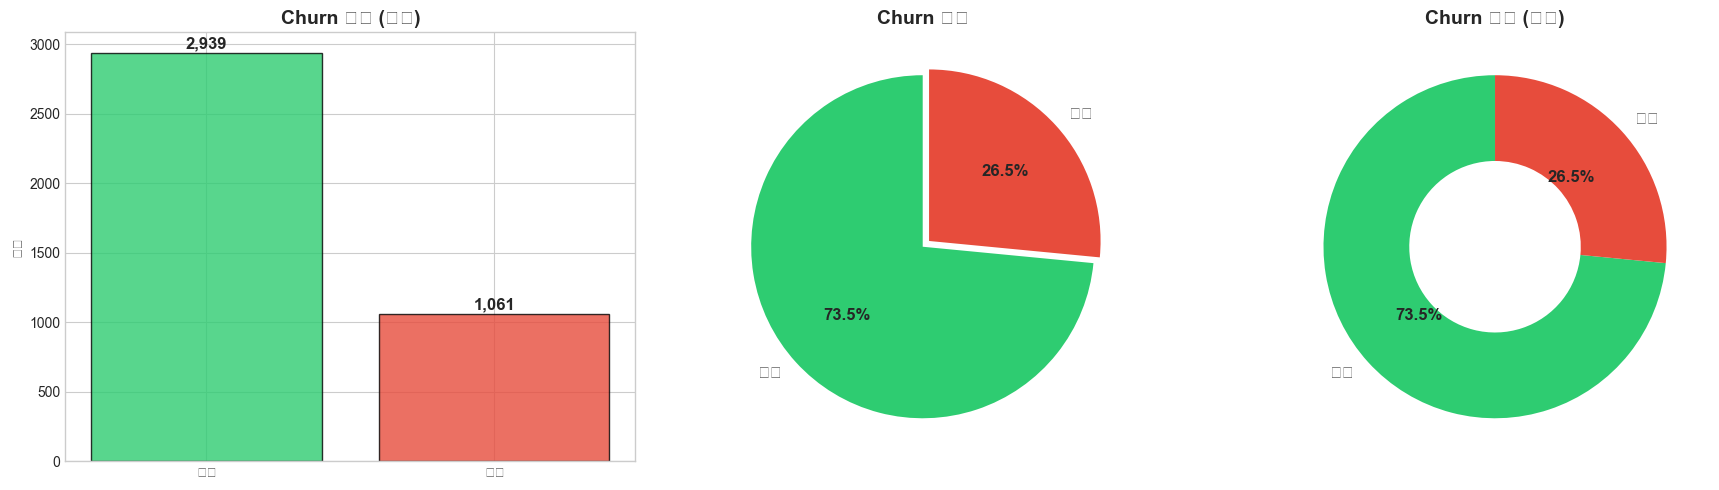

In [43]:
# Churn 분포 시각화
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. 막대 그래프
colors = ['#2ecc71', '#e74c3c']
axes[0].bar(['유지', '이탈'], churn_counts.values, color=colors, alpha=0.8, edgecolor='black')
axes[0].set_title('Churn 분포 (빈도)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('빈도', fontweight='bold')
for i, v in enumerate(churn_counts.values):
    axes[0].text(i, v + 30, f'{v:,}', ha='center', fontweight='bold', fontsize=12)

# 2. 원 그래프
axes[1].pie(churn_counts.values, labels=['유지', '이탈'], autopct='%1.1f%%',
            colors=colors, startangle=90, explode=(0, 0.05),
            textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Churn 비율', fontsize=14, fontweight='bold')

# 3. 도넛 차트
wedges, texts, autotexts = axes[2].pie(churn_counts.values, labels=['유지', '이탈'], 
                                         autopct='%1.1f%%', colors=colors, startangle=90,
                                         wedgeprops=dict(width=0.5),
                                         textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[2].set_title('Churn 비율 (도넛)', fontsize=14, fontweight='bold')
plt.rcParams['font.family'] = 'Malgun Gothic'  # 맑은 고딕
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
plt.tight_layout()
plt.show()

## 5️. 범주형 변수 분석

In [44]:
# 범주형 변수 목록
categorical_vars = ['gender', 'Near_Location', 'Partner', 'Promo_friends', 
                   'Phone', 'Contract_period', 'Group_visits']

# 각 범주형 변수별 Churn 비율
print("범주형 변수별 Churn 비율")

for var in categorical_vars:
    print(f"[{var}]")
    churn_by_var = pd.crosstab(data[var], data['Churn'], normalize='index') * 100
    churn_by_var.columns = ['유지(%)', '이탈(%)']
    print(churn_by_var.round(2))
    
    # 카이제곱 검정
    contingency_table = pd.crosstab(data[var], data['Churn'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f"카이제곱 검정 p-value: {p_value:.4f}", end="")
    if p_value < 0.05:
        print(" 통계적으로 유의함")
    else:
        print(" 통계적으로 유의하지 않음")

범주형 변수별 Churn 비율
[gender]
        유지(%)  이탈(%)
gender              
0       73.51  26.49
1       73.44  26.56
카이제곱 검정 p-value: 0.9929 통계적으로 유의하지 않음
[Near_Location]
               유지(%)  이탈(%)
Near_Location              
0              60.26  39.74
1              75.89  24.11
카이제곱 검정 p-value: 0.0000 통계적으로 유의함
[Partner]
         유지(%)  이탈(%)
Partner              
0        66.68  33.32
1        80.64  19.36
카이제곱 검정 p-value: 0.0000 통계적으로 유의함
[Promo_friends]
               유지(%)  이탈(%)
Promo_friends              
0              68.69  31.31
1              84.20  15.80
카이제곱 검정 p-value: 0.0000 통계적으로 유의함
[Phone]
       유지(%)  이탈(%)
Phone              
0      73.32  26.68
1      73.49  26.51
카이제곱 검정 p-value: 0.9890 통계적으로 유의하지 않음
[Contract_period]
                 유지(%)  이탈(%)
Contract_period              
1                57.68  42.32
6                87.52  12.48
12               97.60   2.40
카이제곱 검정 p-value: 0.0000 통계적으로 유의함
[Group_visits]
              유지(%)  이탈(%)
Group_visits              

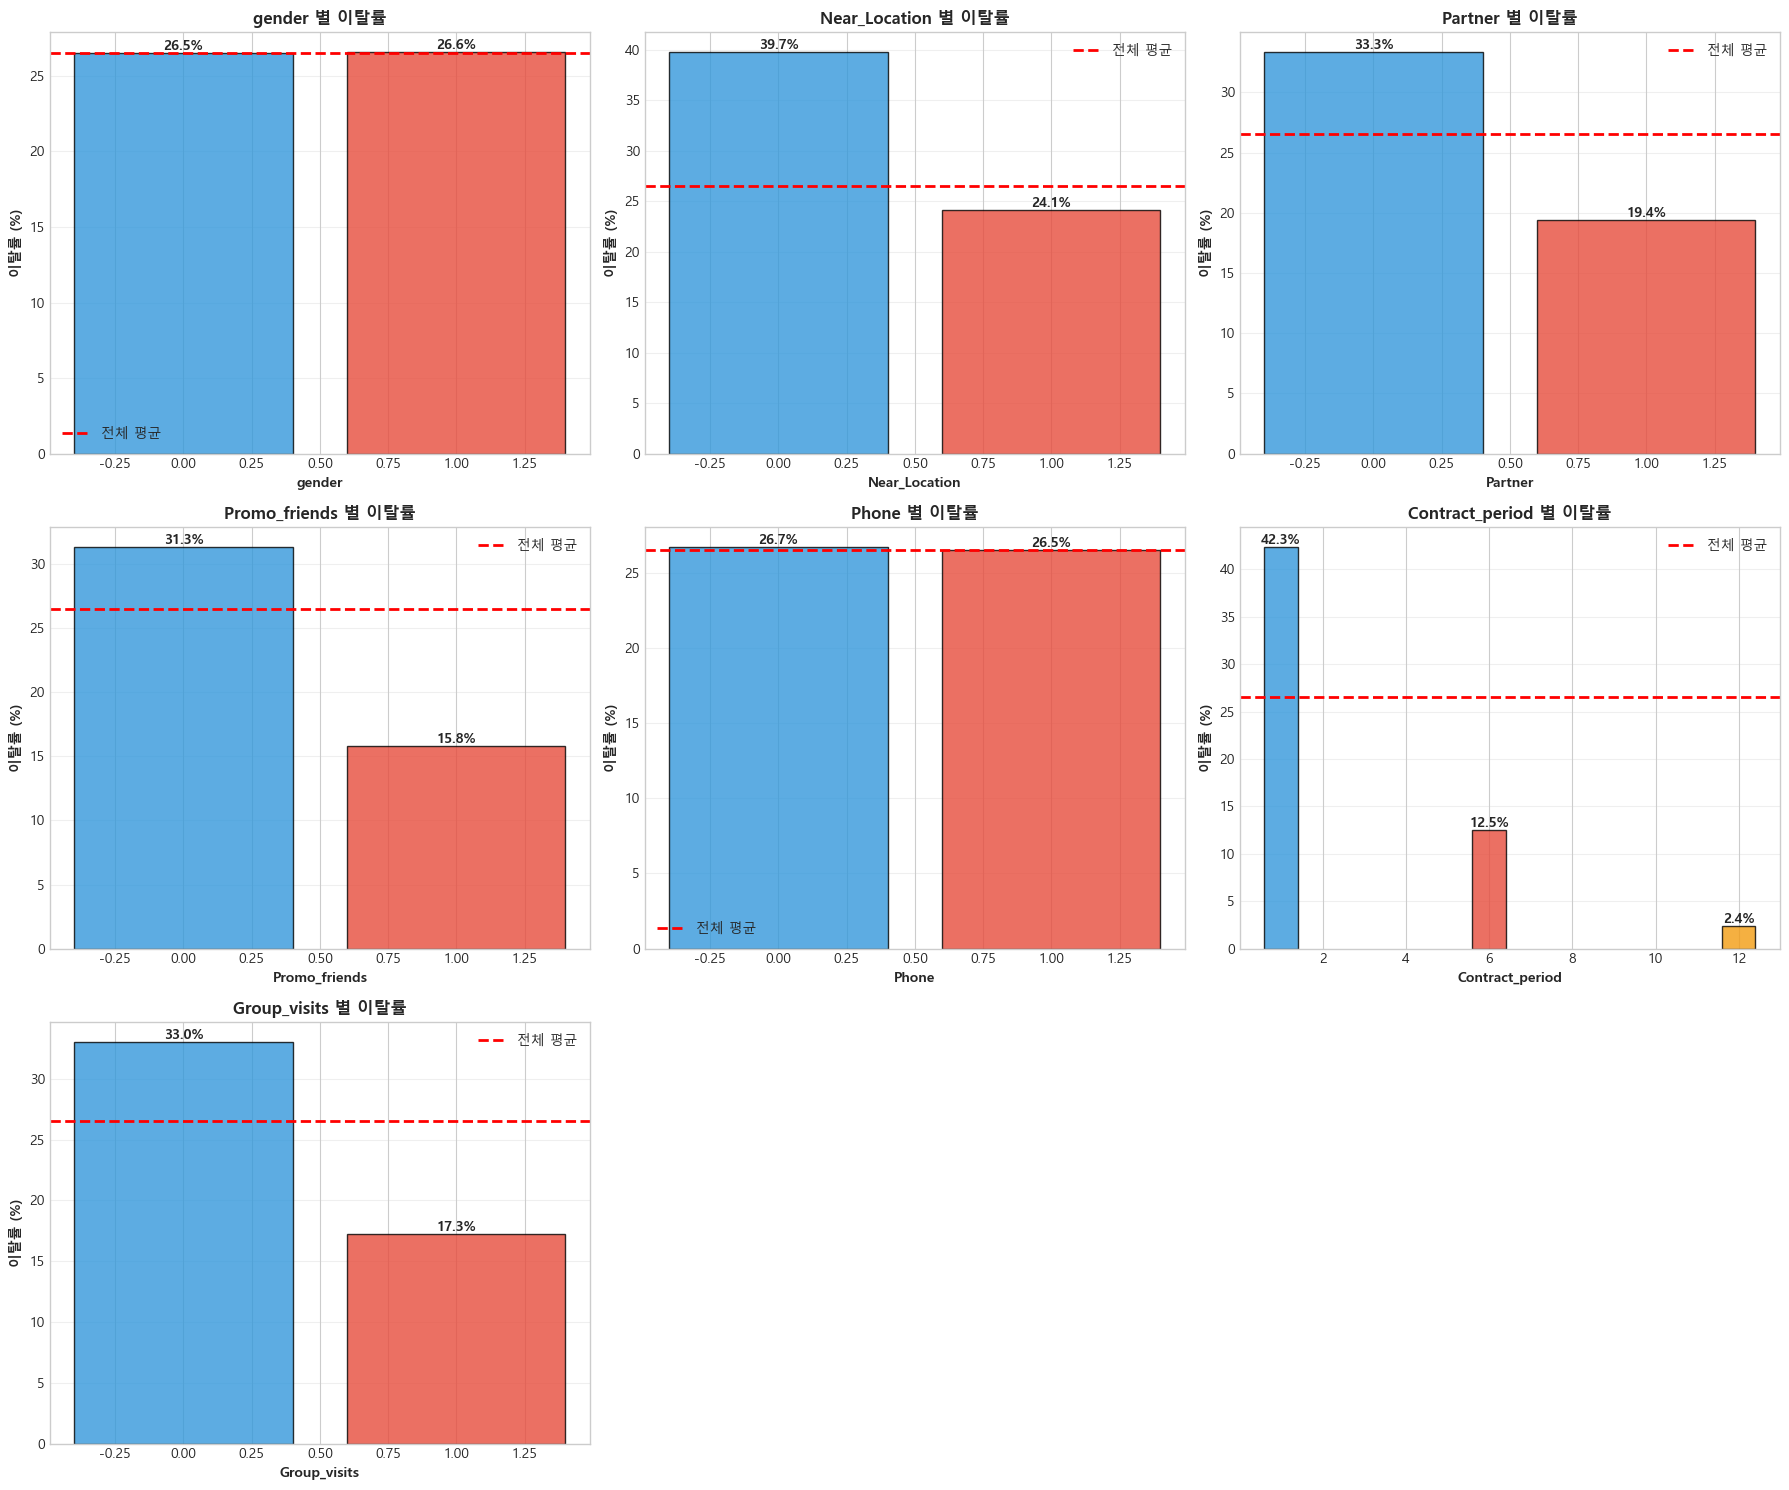

In [45]:
# 범주형 변수 시각화
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

for idx, var in enumerate(categorical_vars):
    # 이탈률 계산
    churn_rate = data.groupby(var)['Churn'].mean() * 100
    
    # 막대 그래프
    bars = axes[idx].bar(churn_rate.index, churn_rate.values, 
                         color=['#3498db', '#e74c3c', '#f39c12'][:len(churn_rate)],
                         alpha=0.8, edgecolor='black')
    axes[idx].set_title(f'{var} 별 이탈률', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(var, fontweight='bold')
    axes[idx].set_ylabel('이탈률 (%)', fontweight='bold')
    axes[idx].axhline(y=data['Churn'].mean()*100, color='red', linestyle='--', 
                      linewidth=2, label='전체 평균')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3, axis='y')
    
    # 값 표시
    for bar in bars:
        height = bar.get_height()
        axes[idx].text(bar.get_x() + bar.get_width()/2., height,
                      f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

# 빈 subplot 제거
for idx in range(len(categorical_vars), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

## 6️. 수치형 변수 분석

In [46]:
# 수치형 변수 목록
numerical_vars = ['Age', 'Avg_additional_charges_total', 'Month_to_end_contract',
                 'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month']

# Churn 그룹별 수치형 변수 통계
print("Churn 그룹별 수치형 변수 통계")

for var in numerical_vars:
    print(f"[{var}]")
    
    # 그룹별 통계
    stats_df = data.groupby('Churn')[var].agg(['mean', 'median', 'std', 'min', 'max'])
    stats_df.index = ['유지', '이탈']
    print(stats_df.round(2))
    
    # t-검정
    no_churn = data[data['Churn'] == 0][var]
    churn = data[data['Churn'] == 1][var]
    t_stat, p_value = ttest_ind(no_churn, churn, nan_policy='omit')
    print(f"t-검정 p-value: {p_value:.4f}", end="")
    if p_value < 0.05:
        print("통계적으로 유의한 차이")
    else:
        print("통계적으로 유의한 차이 없음")

Churn 그룹별 수치형 변수 통계
[Age]
     mean  median   std  min  max
유지  29.98    30.0  3.01   19   41
이탈  26.99    27.0  2.90   18   38
t-검정 p-value: 0.0000통계적으로 유의한 차이
[Avg_additional_charges_total]
      mean  median   std   min     max
유지  158.45  149.88  99.8  0.17  552.59
이탈  115.08  103.81  77.7  0.15  425.54
t-검정 p-value: 0.0000통계적으로 유의한 차이
[Month_to_end_contract]
    mean  median   std  min   max
유지  5.28     6.0  4.36  1.0  12.0
이탈  1.66     1.0  1.96  1.0  12.0
t-검정 p-value: 0.0000통계적으로 유의한 차이
[Lifetime]
    mean  median   std  min  max
유지  4.71     4.0  3.87    0   31
이탈  0.99     1.0  1.11    0    9
t-검정 p-value: 0.0000통계적으로 유의한 차이
[Avg_class_frequency_total]
    mean  median   std  min   max
유지  2.02    2.04  1.02  0.0  6.02
이탈  1.47    1.49  0.69  0.0  3.48
t-검정 p-value: 0.0000통계적으로 유의한 차이
[Avg_class_frequency_current_month]
    mean  median   std  min   max
유지  2.03    2.05  1.02  0.0  6.15
이탈  1.04    0.98  0.77  0.0  3.54
t-검정 p-value: 0.0000통계적으로 유의한 차이


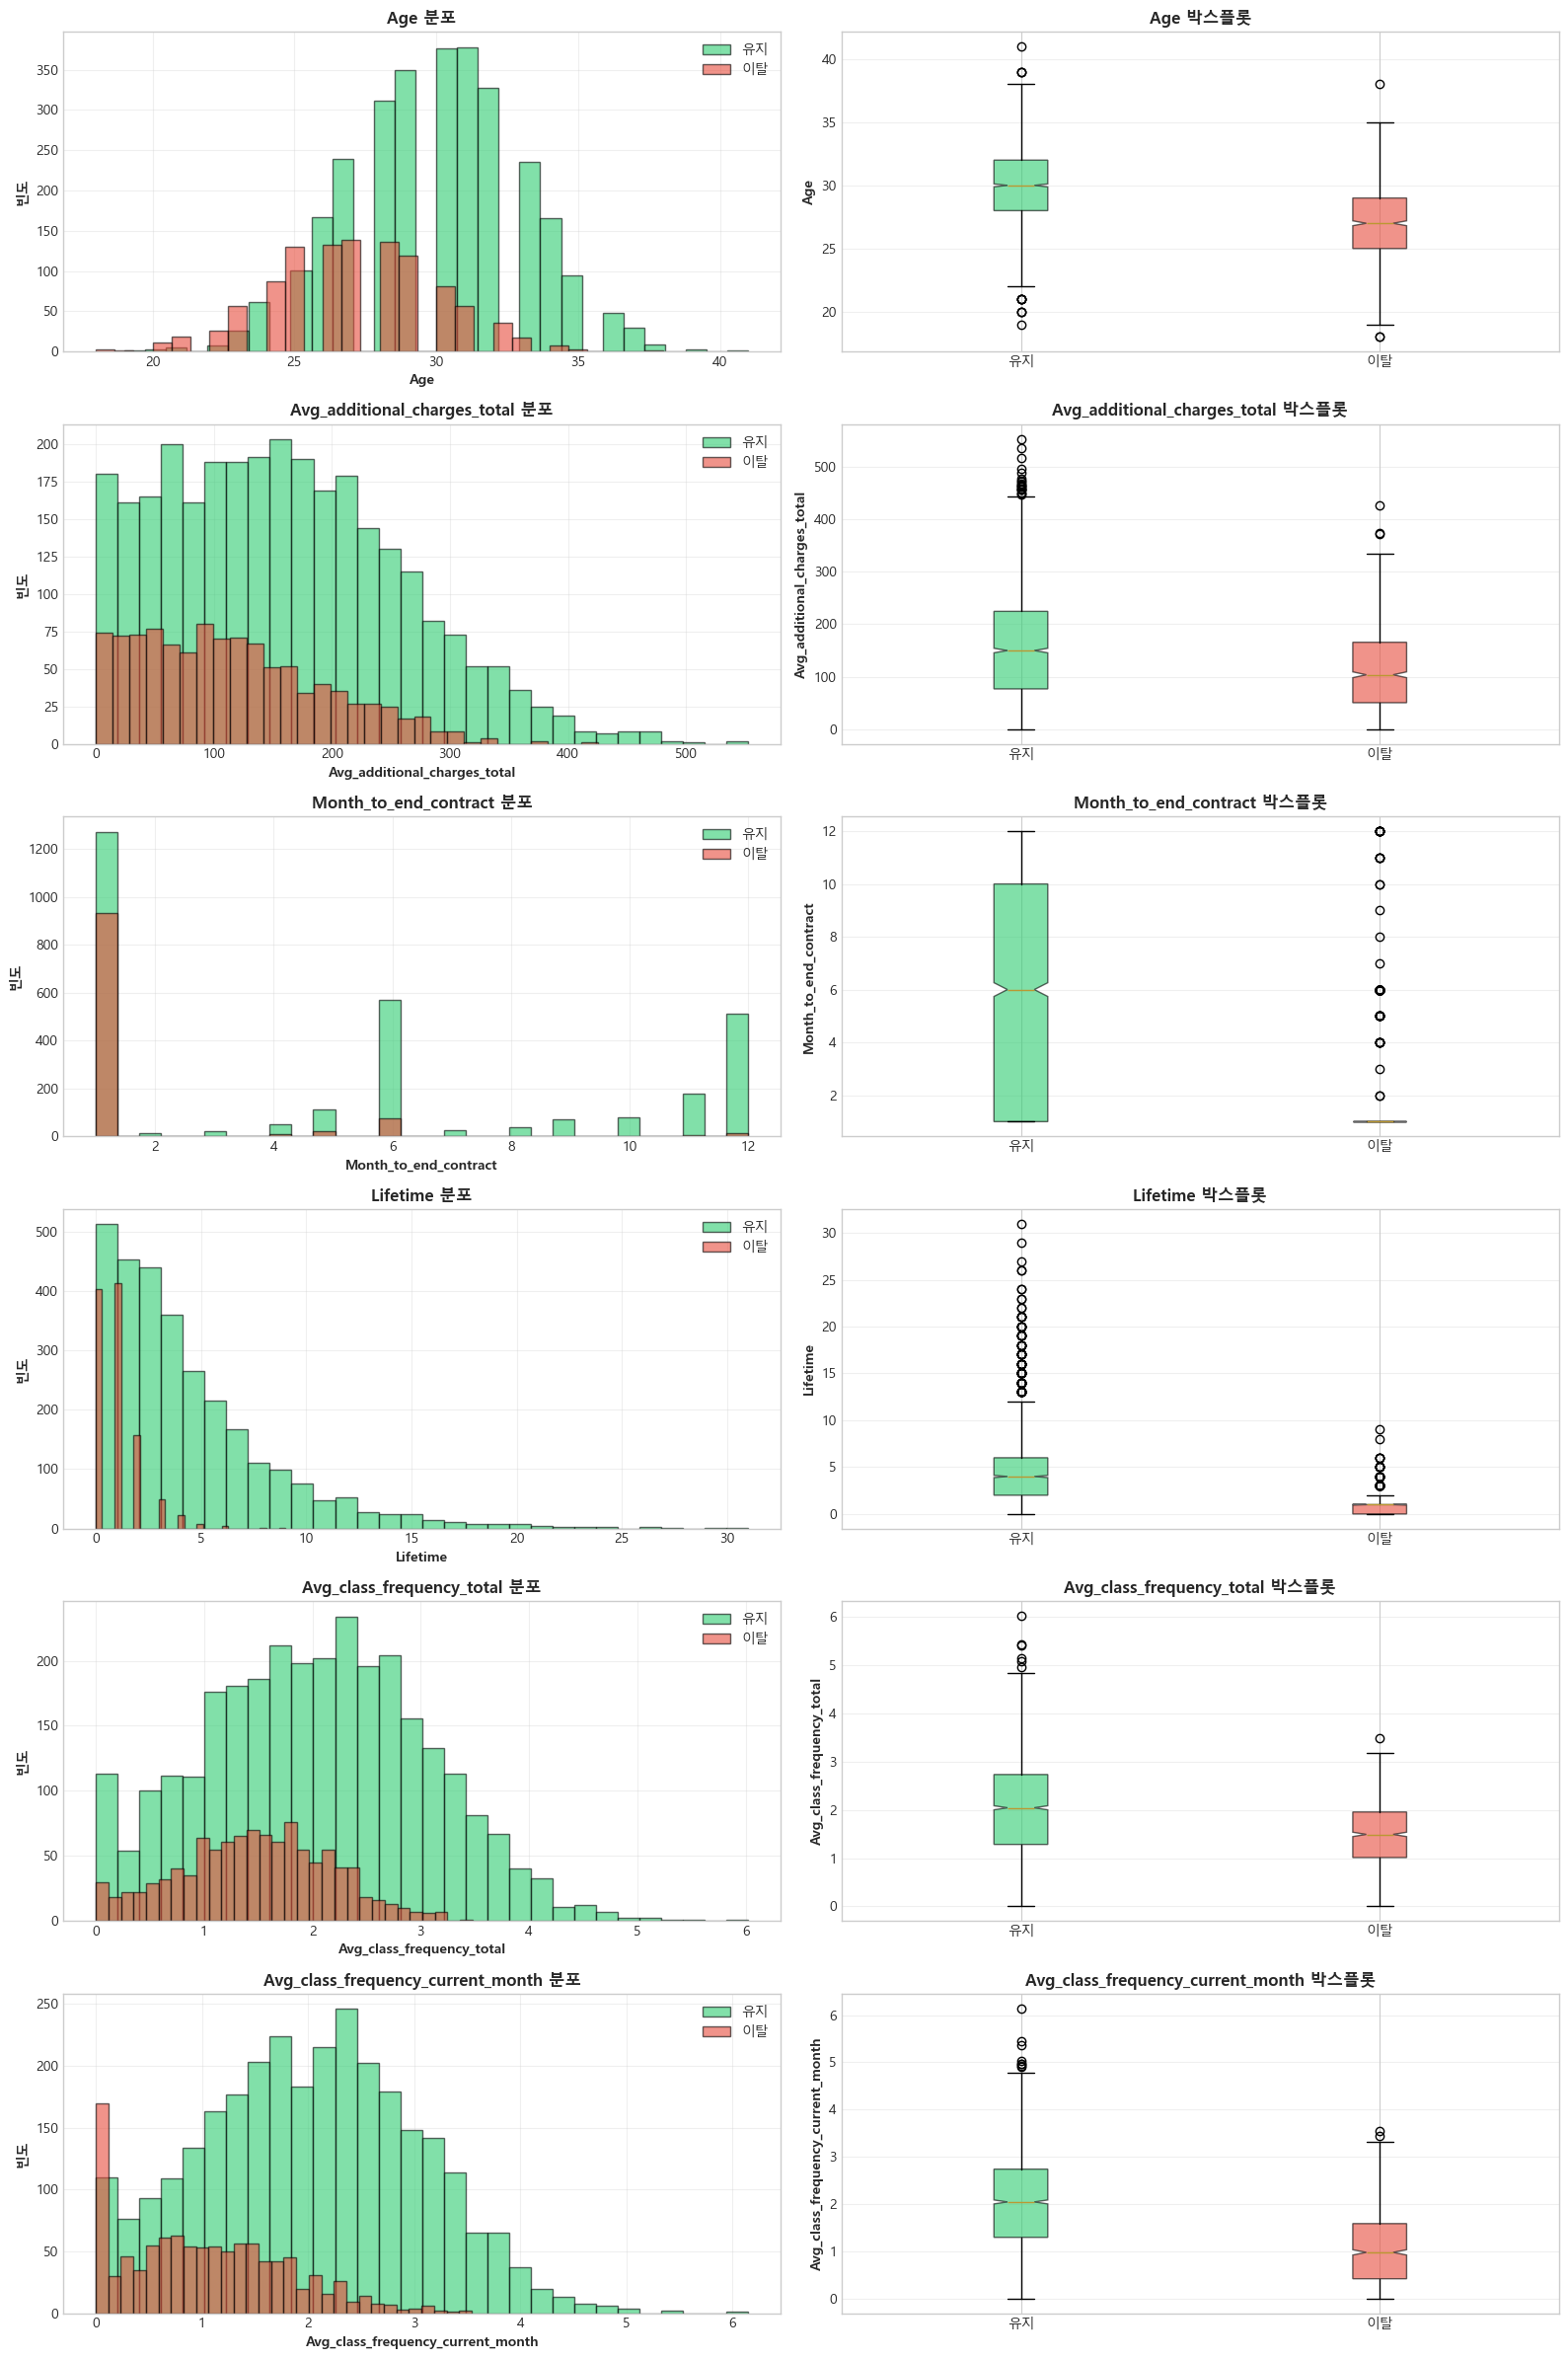

In [47]:
# 수치형 변수 분포 시각화 (히스토그램 + 박스플롯)
fig, axes = plt.subplots(6, 2, figsize=(16, 24))

for idx, var in enumerate(numerical_vars):
    # 히스토그램
    axes[idx, 0].hist(data[data['Churn']==0][var].dropna(), bins=30, alpha=0.6, 
                     label='유지', color='#2ecc71', edgecolor='black')
    axes[idx, 0].hist(data[data['Churn']==1][var].dropna(), bins=30, alpha=0.6, 
                     label='이탈', color='#e74c3c', edgecolor='black')
    axes[idx, 0].set_title(f'{var} 분포', fontsize=12, fontweight='bold')
    axes[idx, 0].set_xlabel(var, fontweight='bold')
    axes[idx, 0].set_ylabel('빈도', fontweight='bold')
    axes[idx, 0].legend()
    axes[idx, 0].grid(True, alpha=0.3)
    
    # 박스플롯
    data_to_plot = [data[data['Churn']==0][var].dropna(), 
                    data[data['Churn']==1][var].dropna()]
    bp = axes[idx, 1].boxplot(data_to_plot, labels=['유지', '이탈'],
                              patch_artist=True, notch=True)
    for patch, color in zip(bp['boxes'], ['#2ecc71', '#e74c3c']):
        patch.set_facecolor(color)
        patch.set_alpha(0.6)
    axes[idx, 1].set_title(f'{var} 박스플롯', fontsize=12, fontweight='bold')
    axes[idx, 1].set_ylabel(var, fontweight='bold')
    axes[idx, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## 7️ 상관관계 분석

In [48]:
# 상관계수 행렬
print("상관계수 행렬")

correlation_matrix = data.corr()
print(correlation_matrix.round(2))

# Churn과의 상관계수 (절대값 기준 정렬)
print("Churn과의 상관계수 (절대값 기준 내림차순)")
churn_corr = correlation_matrix['Churn'].drop('Churn').sort_values(key=abs, ascending=False)
print(churn_corr.round(4))

상관계수 행렬
                                   gender  Near_Location  Partner  \
gender                               1.00           0.01    -0.01   
Near_Location                        0.01           1.00    -0.01   
Partner                             -0.01          -0.01     1.00   
Promo_friends                       -0.01           0.21     0.45   
Phone                               -0.01          -0.02     0.01   
Contract_period                      0.00           0.15     0.31   
Group_visits                         0.02           0.15     0.02   
Age                                  0.01           0.06     0.05   
Avg_additional_charges_total        -0.01           0.04     0.02   
Month_to_end_contract               -0.00           0.14     0.29   
Lifetime                             0.01           0.07     0.06   
Avg_class_frequency_total            0.01           0.04     0.02   
Avg_class_frequency_current_month    0.01           0.06     0.05   
Churn                     

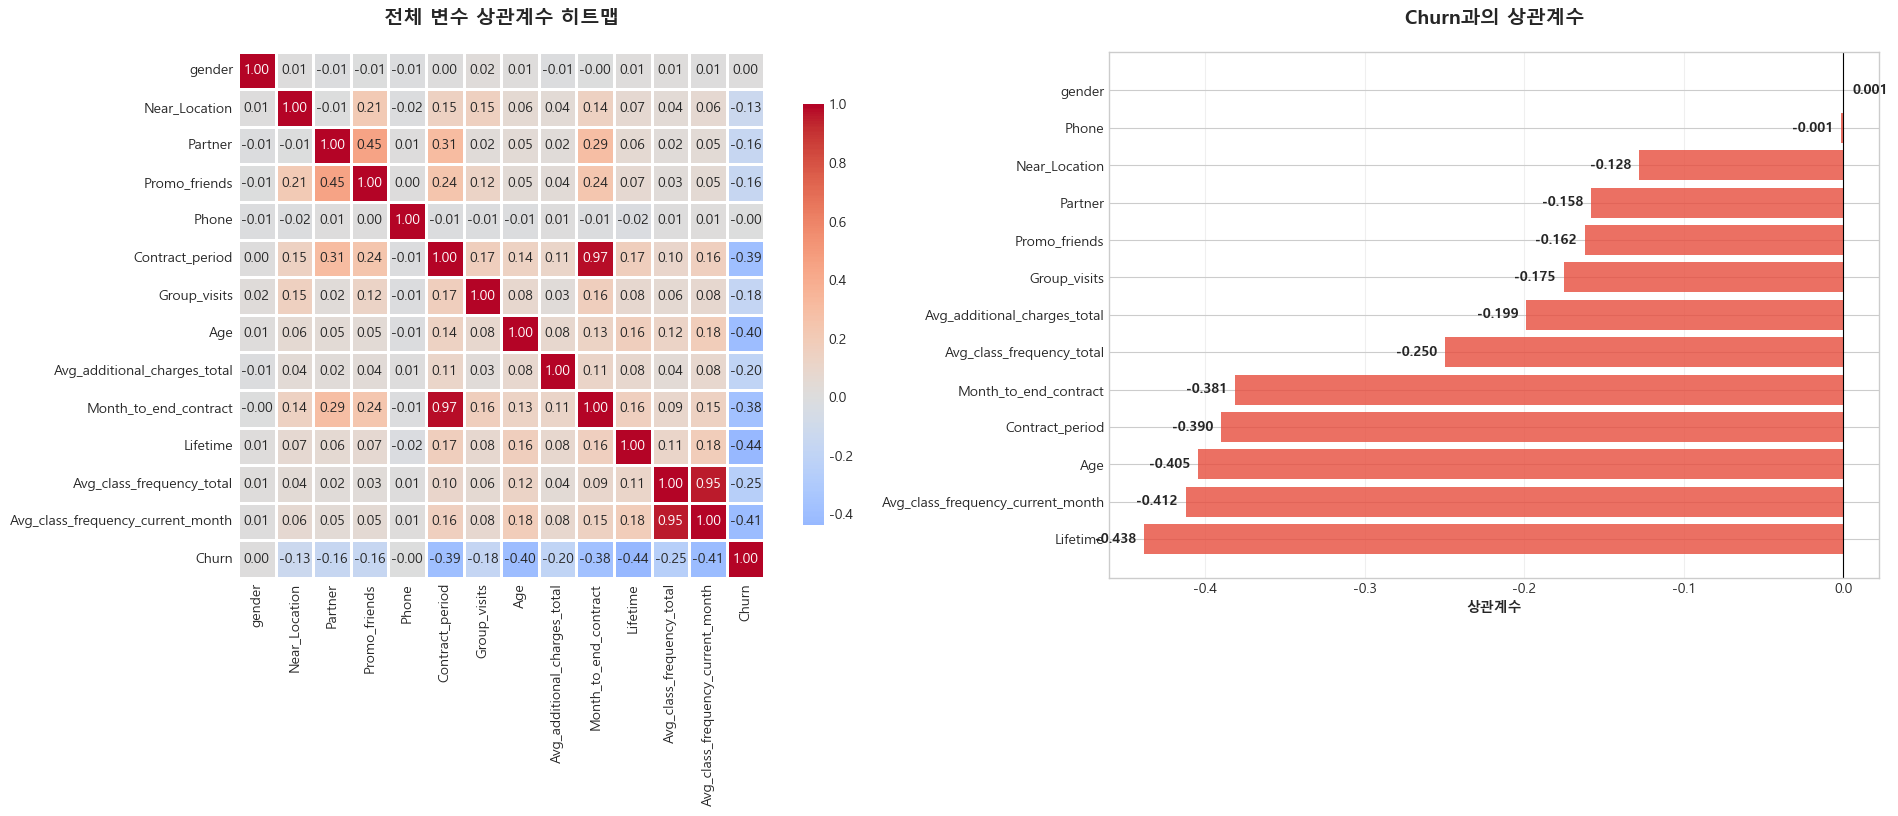

In [49]:
# 상관계수 히트맵
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# 전체 상관계수 히트맵
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            ax=axes[0])
axes[0].set_title('전체 변수 상관계수 히트맵', fontsize=14, fontweight='bold', pad=20)

# Churn과의 상관계수 막대 그래프
churn_corr_sorted = churn_corr.sort_values()
colors_bar = ['#e74c3c' if x < 0 else '#2ecc71' for x in churn_corr_sorted.values]
axes[1].barh(range(len(churn_corr_sorted)), churn_corr_sorted.values, color=colors_bar, alpha=0.8)
axes[1].set_yticks(range(len(churn_corr_sorted)))
axes[1].set_yticklabels(churn_corr_sorted.index)
axes[1].set_xlabel('상관계수', fontweight='bold')
axes[1].set_title('Churn과의 상관계수', fontsize=14, fontweight='bold', pad=20)
axes[1].axvline(x=0, color='black', linestyle='-', linewidth=0.8)
axes[1].grid(True, alpha=0.3, axis='x')

for i, v in enumerate(churn_corr_sorted.values):
    axes[1].text(v + 0.005 if v > 0 else v - 0.005, i, f'{v:.3f}', 
                va='center', ha='left' if v > 0 else 'right', fontweight='bold')

plt.tight_layout()
plt.show()

## 8️. 주요 특성별 심층 분석

### 8-1. Lifetime (회원 활동 기간) 분석

Lifetime 구간별 이탈률
                전체 회원 수  이탈 회원 수    이탈률
Lifetime_group                         
0-3개월              1943      621  31.96
3-6개월               876       35   4.00
6-12개월              555        2   0.36
12-24개월             134        0   0.00
24개월+                 5        0   0.00


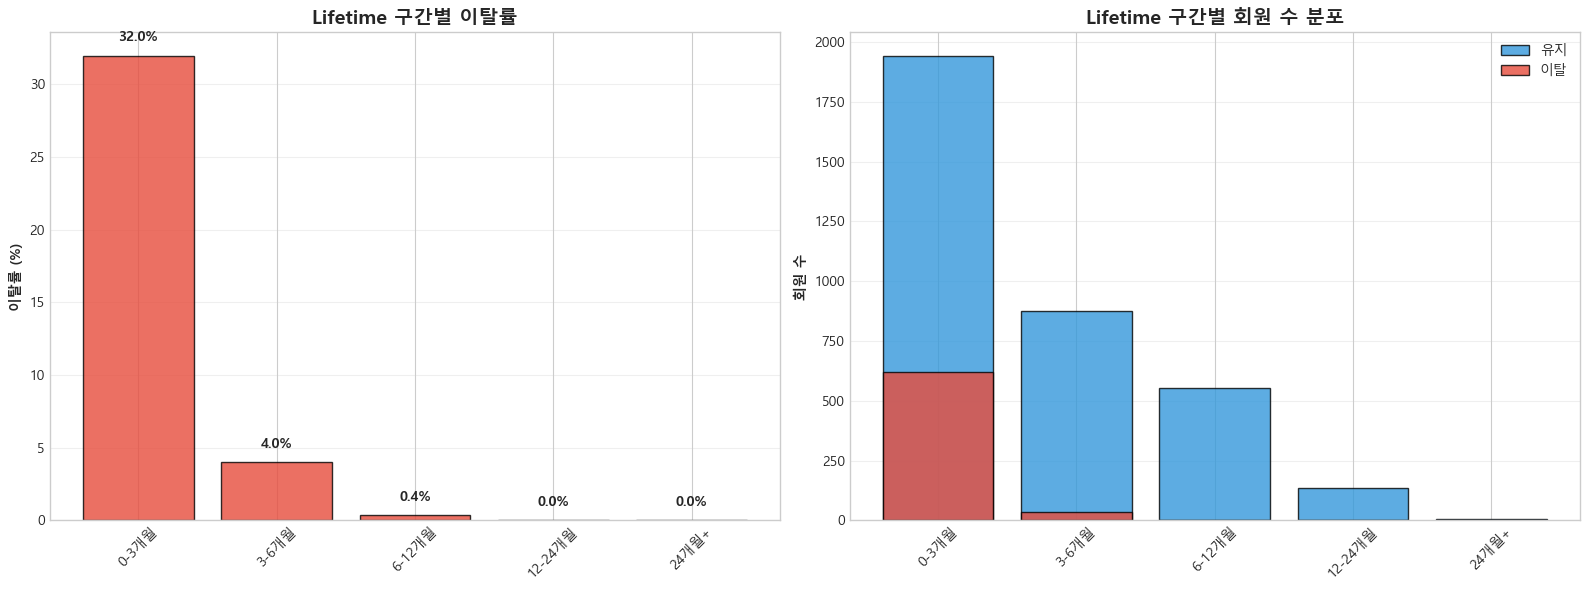

In [50]:
# Lifetime 구간별 이탈률
lifetime_bins = [0, 3, 6, 12, 24, np.inf]
lifetime_labels = ['0-3개월', '3-6개월', '6-12개월', '12-24개월', '24개월+']
data['Lifetime_group'] = pd.cut(data['Lifetime'], bins=lifetime_bins, labels=lifetime_labels)

print("Lifetime 구간별 이탈률")

lifetime_churn = data.groupby('Lifetime_group', observed=True).agg({
    'Churn': ['count', 'sum', 'mean']
})
lifetime_churn.columns = ['전체 회원 수', '이탈 회원 수', '이탈률']
lifetime_churn['이탈률'] = (lifetime_churn['이탈률'] * 100).round(2)
print(lifetime_churn)

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 이탈률
axes[0].bar(range(len(lifetime_churn)), lifetime_churn['이탈률'], 
           color='#e74c3c', alpha=0.8, edgecolor='black')
axes[0].set_xticks(range(len(lifetime_churn)))
axes[0].set_xticklabels(lifetime_churn.index, rotation=45)
axes[0].set_ylabel('이탈률 (%)', fontweight='bold')
axes[0].set_title('Lifetime 구간별 이탈률', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')

for i, v in enumerate(lifetime_churn['이탈률']):
    axes[0].text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

# 회원 수 분포
axes[1].bar(range(len(lifetime_churn)), lifetime_churn['전체 회원 수'], 
           color='#3498db', alpha=0.8, edgecolor='black', label='유지')
axes[1].bar(range(len(lifetime_churn)), lifetime_churn['이탈 회원 수'], 
           color='#e74c3c', alpha=0.8, edgecolor='black', label='이탈')
axes[1].set_xticks(range(len(lifetime_churn)))
axes[1].set_xticklabels(lifetime_churn.index, rotation=45)
axes[1].set_ylabel('회원 수', fontweight='bold')
axes[1].set_title('Lifetime 구간별 회원 수 분포', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

### 8-2. Contract Period (계약 기간) 분석

계약 기간별 상세 분석
                 회원 수  이탈 수   이탈률  평균 Lifetime  평균 수업빈도  평균 추가요금
Contract_period                                                 
1                2207   934  42.0         3.16     1.80   137.93
6                 833   104  12.0         4.14     1.95   151.65
12                960    23   2.0         4.66     2.01   163.59


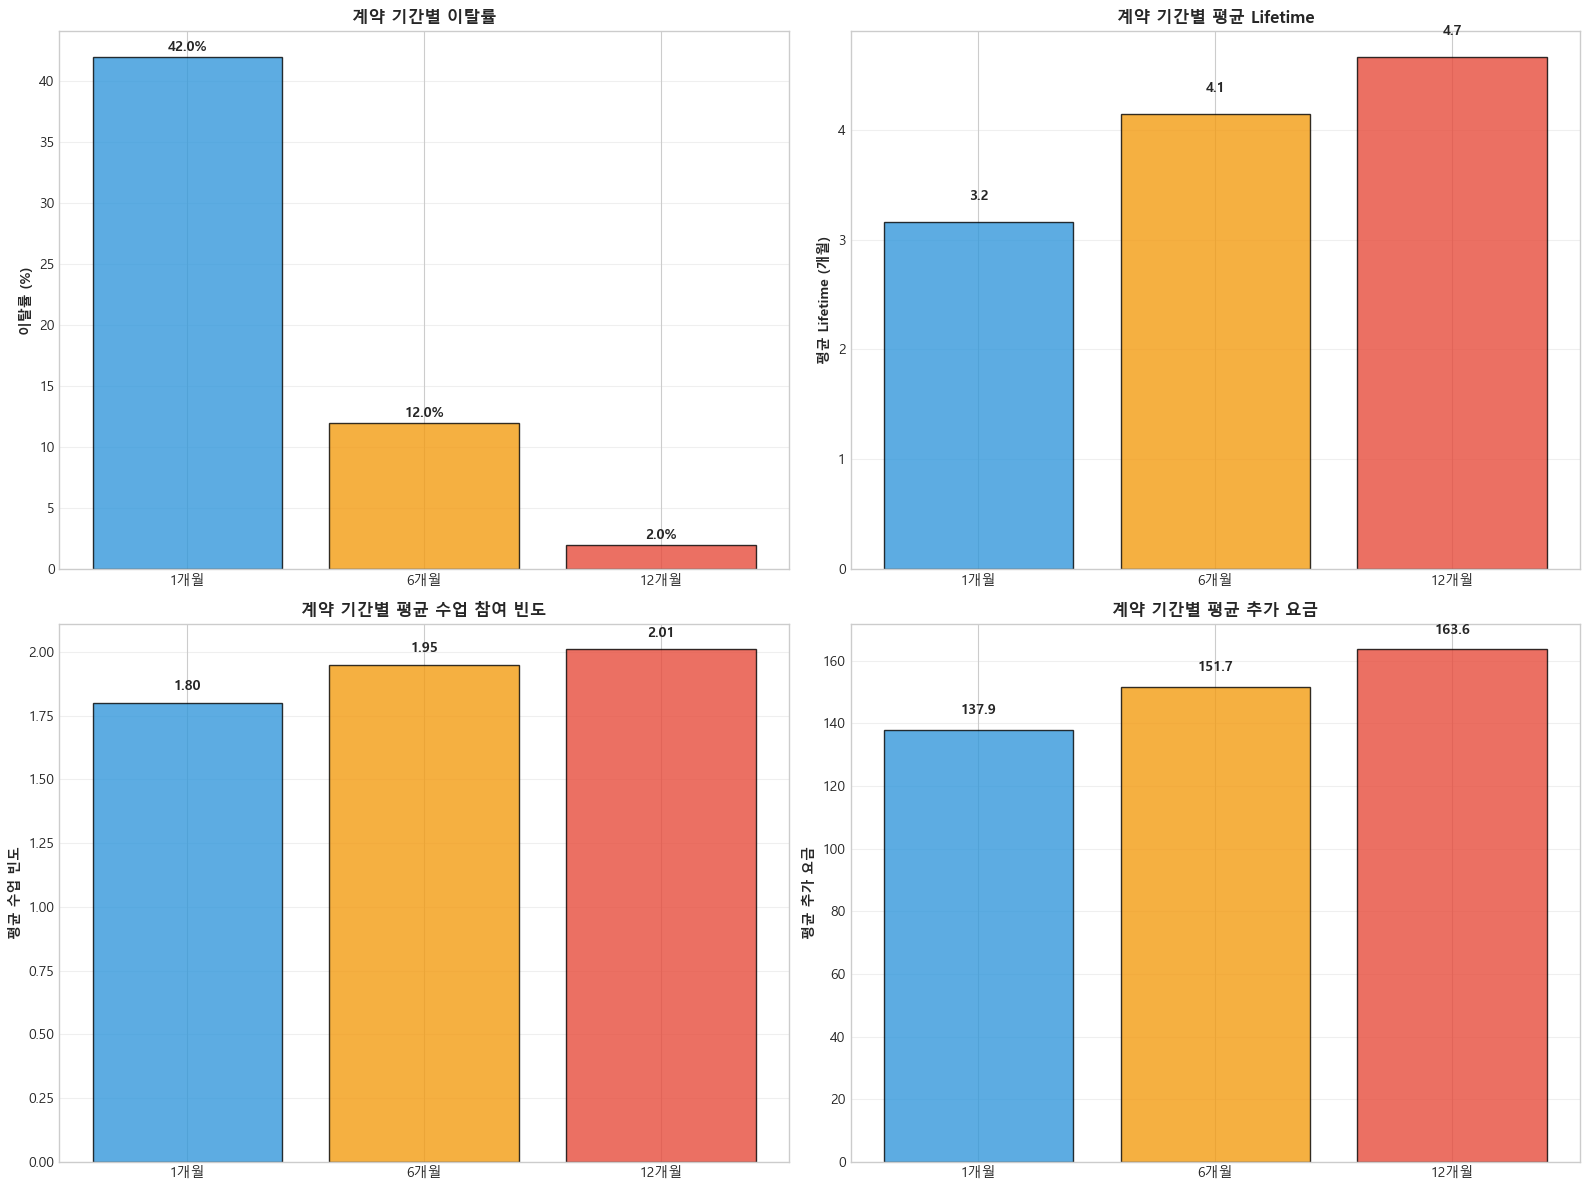

In [51]:
# 계약 기간별 상세 분석
print("계약 기간별 상세 분석")

contract_analysis = data.groupby('Contract_period').agg({
    'Churn': ['count', 'sum', 'mean'],
    'Lifetime': 'mean',
    'Avg_class_frequency_total': 'mean',
    'Avg_additional_charges_total': 'mean'
}).round(2)

contract_analysis.columns = ['회원 수', '이탈 수', '이탈률', '평균 Lifetime', 
                             '평균 수업빈도', '평균 추가요금']
contract_analysis['이탈률'] = (contract_analysis['이탈률'] * 100).round(2)

print(contract_analysis)

# 시각화
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

contract_periods = contract_analysis.index.astype(str) + '개월'
colors = ['#3498db', '#f39c12', '#e74c3c']

# 이탈률
axes[0, 0].bar(contract_periods, contract_analysis['이탈률'], color=colors, alpha=0.8, edgecolor='black')
axes[0, 0].set_ylabel('이탈률 (%)', fontweight='bold')
axes[0, 0].set_title('계약 기간별 이탈률', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(contract_analysis['이탈률']):
    axes[0, 0].text(i, v + 0.5, f'{v:.1f}%', ha='center', fontweight='bold')

# 평균 Lifetime
axes[0, 1].bar(contract_periods, contract_analysis['평균 Lifetime'], color=colors, alpha=0.8, edgecolor='black')
axes[0, 1].set_ylabel('평균 Lifetime (개월)', fontweight='bold')
axes[0, 1].set_title('계약 기간별 평균 Lifetime', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(contract_analysis['평균 Lifetime']):
    axes[0, 1].text(i, v + 0.2, f'{v:.1f}', ha='center', fontweight='bold')

# 평균 수업빈도
axes[1, 0].bar(contract_periods, contract_analysis['평균 수업빈도'], color=colors, alpha=0.8, edgecolor='black')
axes[1, 0].set_ylabel('평균 수업 빈도', fontweight='bold')
axes[1, 0].set_title('계약 기간별 평균 수업 참여 빈도', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(contract_analysis['평균 수업빈도']):
    axes[1, 0].text(i, v + 0.05, f'{v:.2f}', ha='center', fontweight='bold')

# 평균 추가요금
axes[1, 1].bar(contract_periods, contract_analysis['평균 추가요금'], color=colors, alpha=0.8, edgecolor='black')
axes[1, 1].set_ylabel('평균 추가 요금', fontweight='bold')
axes[1, 1].set_title('계약 기간별 평균 추가 요금', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(contract_analysis['평균 추가요금']):
    axes[1, 1].text(i, v + 5, f'{v:.1f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

### 8-3. 수업 참여도 분석

수업 참여도에 따른 이탈률
                  전체 회원 수  이탈 회원 수    이탈률
Class_freq_group                         
0-1회                  659      238  36.12
1-2회                 1498      554  36.98
2-3회                 1225      234  19.10
3회+                   530       15   2.83


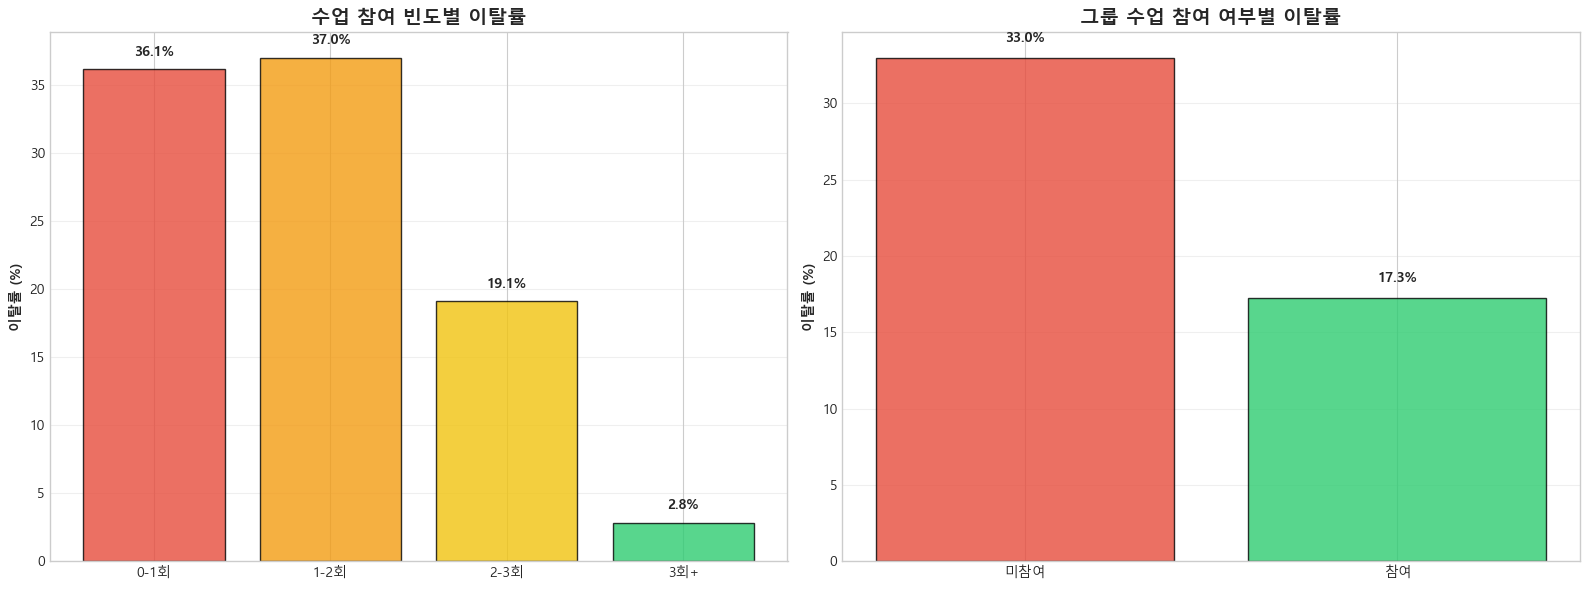

In [52]:
# 수업 참여도에 따른 이탈률
print("수업 참여도에 따른 이탈률")

# 수업 빈도 구간화
freq_bins = [0, 1, 2, 3, np.inf]
freq_labels = ['0-1회', '1-2회', '2-3회', '3회+']
data['Class_freq_group'] = pd.cut(data['Avg_class_frequency_total'], 
                                   bins=freq_bins, labels=freq_labels)

freq_churn = data.groupby('Class_freq_group', observed=True).agg({
    'Churn': ['count', 'sum', 'mean']
})
freq_churn.columns = ['전체 회원 수', '이탈 회원 수', '이탈률']
freq_churn['이탈률'] = (freq_churn['이탈률'] * 100).round(2)
print(freq_churn)

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 수업 빈도별 이탈률
axes[0].bar(range(len(freq_churn)), freq_churn['이탈률'], 
           color=['#e74c3c', '#f39c12', '#f1c40f', '#2ecc71'], alpha=0.8, edgecolor='black')
axes[0].set_xticks(range(len(freq_churn)))
axes[0].set_xticklabels(freq_churn.index)
axes[0].set_ylabel('이탈률 (%)', fontweight='bold')
axes[0].set_title('수업 참여 빈도별 이탈률', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')

for i, v in enumerate(freq_churn['이탈률']):
    axes[0].text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

# 그룹 수업 참여 여부별 이탈률
group_churn = data.groupby('Group_visits')['Churn'].mean() * 100
axes[1].bar(['미참여', '참여'], group_churn.values, 
           color=['#e74c3c', '#2ecc71'], alpha=0.8, edgecolor='black')
axes[1].set_ylabel('이탈률 (%)', fontweight='bold')
axes[1].set_title('그룹 수업 참여 여부별 이탈률', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

for i, v in enumerate(group_churn.values):
    axes[1].text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

## 9️. 다변량 분석

주요 변수 간 관계 분석 (Pairplot)


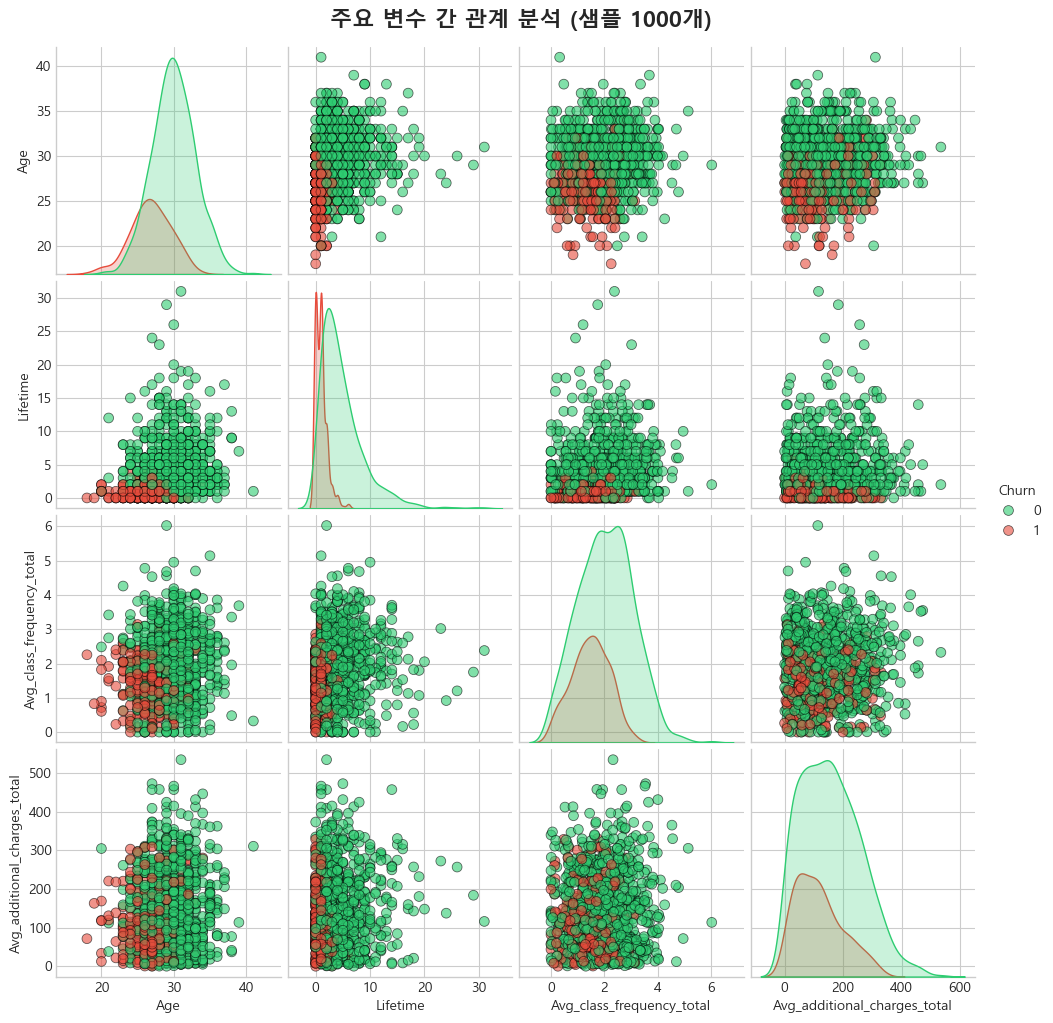

In [53]:
# Pairplot (주요 변수들)
print("주요 변수 간 관계 분석 (Pairplot)")

key_vars = ['Age', 'Lifetime', 'Avg_class_frequency_total', 
           'Avg_additional_charges_total', 'Churn']

# 샘플링 (시각화 속도 향상)
sample_data = data[key_vars].sample(n=min(1000, len(data)), random_state=42)

pairplot = sns.pairplot(sample_data, hue='Churn', 
                       palette={0: '#2ecc71', 1: '#e74c3c'},
                       diag_kind='kde', height=2.5, aspect=1,
                       plot_kws={'alpha': 0.6, 's': 50, 'edgecolor': 'black'})
pairplot.fig.suptitle('주요 변수 간 관계 분석 (샘플 1000개)', 
                      y=1.02, fontsize=16, fontweight='bold')
plt.show()

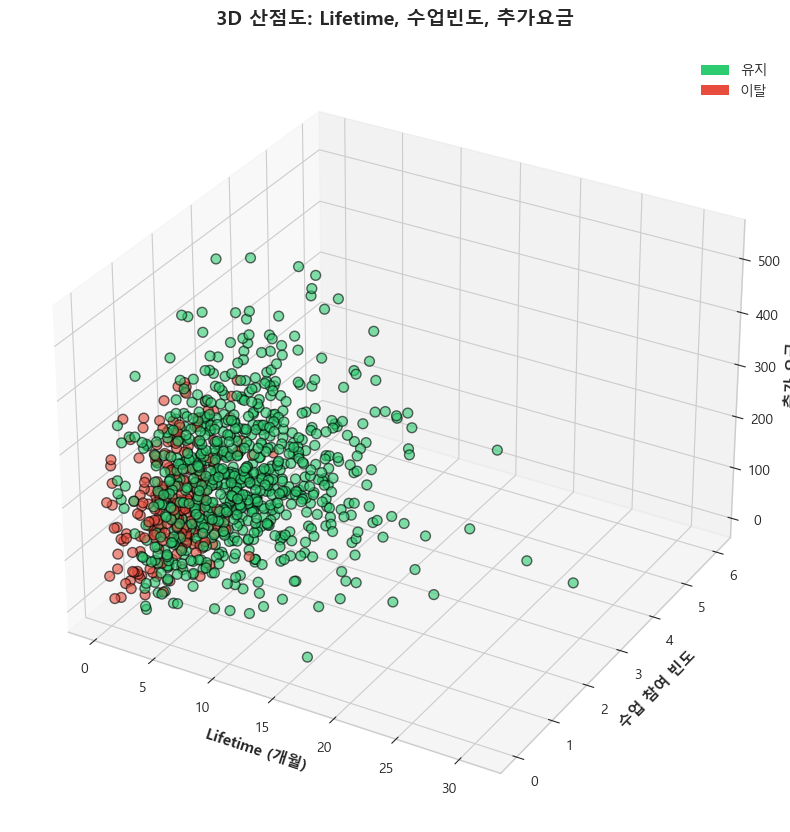

In [54]:
# 3차원 산점도 (Lifetime, 수업빈도, 추가요금)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# 샘플링
sample_idx = data.sample(n=min(1000, len(data)), random_state=42).index
sample = data.loc[sample_idx]

# 이탈/유지별 색상
colors_3d = ['#2ecc71' if c == 0 else '#e74c3c' for c in sample['Churn']]

scatter = ax.scatter(sample['Lifetime'], 
                    sample['Avg_class_frequency_total'],
                    sample['Avg_additional_charges_total'],
                    c=colors_3d, alpha=0.6, s=50, edgecolors='black')

ax.set_xlabel('Lifetime (개월)', fontweight='bold', fontsize=11)
ax.set_ylabel('수업 참여 빈도', fontweight='bold', fontsize=11)
ax.set_zlabel('추가 요금', fontweight='bold', fontsize=11)
ax.set_title('3D 산점도: Lifetime, 수업빈도, 추가요금', fontsize=14, fontweight='bold', pad=20)

# 범례
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#2ecc71', label='유지'),
                  Patch(facecolor='#e74c3c', label='이탈')]
ax.legend(handles=legend_elements, loc='upper right')

plt.show()

## 10. 주요 인사이트 요약

In [55]:

print(" EDA 주요 인사이트")

# 1. 전체 이탈률
overall_churn_rate = data['Churn'].mean() * 100
print(f"1. 전체 이탈률: {overall_churn_rate:.2f}%")
print(f"   - 클래스 불균형 비율: {churn_counts[0]/churn_counts[1]:.2f}:1")

# 2. Lifetime 영향
short_term_churn = data[data['Lifetime'] <= 3]['Churn'].mean() * 100
long_term_churn = data[data['Lifetime'] > 12]['Churn'].mean() * 100
print(f"2. Lifetime (회원 기간) 영향:")
print(f"   - 단기 회원 (≤3개월) 이탈률: {short_term_churn:.2f}%")
print(f"   - 장기 회원 (>12개월) 이탈률: {long_term_churn:.2f}%")
print(f"   - 차이: {short_term_churn - long_term_churn:.2f}%p")

# 3. 계약 기간 영향
contract_1_churn = data[data['Contract_period'] == 1]['Churn'].mean() * 100
contract_12_churn = data[data['Contract_period'] == 12]['Churn'].mean() * 100
print(f"3. 계약 기간 영향:")
print(f"   - 1개월 계약 이탈률: {contract_1_churn:.2f}%")
print(f"   - 12개월 계약 이탈률: {contract_12_churn:.2f}%")
print(f"   - 차이: {contract_1_churn - contract_12_churn:.2f}%p")

# 4. 수업 참여도 영향
low_freq_churn = data[data['Avg_class_frequency_total'] < 1]['Churn'].mean() * 100
high_freq_churn = data[data['Avg_class_frequency_total'] >= 3]['Churn'].mean() * 100
print(f"4. 수업 참여도 영향:")
print(f"   - 저참여 (<1회) 이탈률: {low_freq_churn:.2f}%")
print(f"   - 고참여 (≥3회) 이탈률: {high_freq_churn:.2f}%")
print(f"   - 차이: {low_freq_churn - high_freq_churn:.2f}%p")

# 5. 그룹 수업 영향
no_group_churn = data[data['Group_visits'] == 0]['Churn'].mean() * 100
group_churn = data[data['Group_visits'] == 1]['Churn'].mean() * 100
print(f"5. 그룹 수업 참여 영향:")
print(f"   - 미참여 이탈률: {no_group_churn:.2f}%")
print(f"   - 참여 이탈률: {group_churn:.2f}%")
print(f"   - 차이: {no_group_churn - group_churn:.2f}%p")

# 6. 상관관계 Top 3
print(f"6. Churn과 상관관계 Top 3:")
top_3_corr = churn_corr.head(3)
for idx, (feature, corr) in enumerate(top_3_corr.items(), 1):
    print(f"   {idx}. {feature}: {corr:.4f}")

print("EDA 완료!")

print(" 핵심 결론:")
print("   1. Lifetime (회원 기간)이 이탈에 가장 큰 영향을 미침")
print("   2. 단기 계약(1개월)이 장기 계약보다 이탈률이 높음")
print("   3. 수업 참여도가 낮을수록 이탈 가능성 증가")
print("   4. 그룹 수업 참여가 이탈 감소에 효과적")
print("   5. 클래스 불균형 문제로 SMOTE 등 처리 필요")

 EDA 주요 인사이트
1. 전체 이탈률: 26.52%
   - 클래스 불균형 비율: 2.77:1
2. Lifetime (회원 기간) 영향:
   - 단기 회원 (≤3개월) 이탈률: 42.14%
   - 장기 회원 (>12개월) 이탈률: 0.00%
   - 차이: 42.14%p
3. 계약 기간 영향:
   - 1개월 계약 이탈률: 42.32%
   - 12개월 계약 이탈률: 2.40%
   - 차이: 39.92%p
4. 수업 참여도 영향:
   - 저참여 (<1회) 이탈률: 34.54%
   - 고참여 (≥3회) 이탈률: 2.83%
   - 차이: 31.71%p
5. 그룹 수업 참여 영향:
   - 미참여 이탈률: 33.01%
   - 참여 이탈률: 17.28%
   - 차이: 15.72%p
6. Churn과 상관관계 Top 3:
   1. Lifetime: -0.4382
   2. Avg_class_frequency_current_month: -0.4123
   3. Age: -0.4047
EDA 완료!
 핵심 결론:
   1. Lifetime (회원 기간)이 이탈에 가장 큰 영향을 미침
   2. 단기 계약(1개월)이 장기 계약보다 이탈률이 높음
   3. 수업 참여도가 낮을수록 이탈 가능성 증가
   4. 그룹 수업 참여가 이탈 감소에 효과적
   5. 클래스 불균형 문제로 SMOTE 등 처리 필요
